In [67]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from math import pi
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [68]:
nx = 41
ny = 41

l = 1
h = 1

dx = 1/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [69]:
def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

In [70]:
def poissonIG(uh, dx, dy, nx, ny, xmax, xmin, ymax, ymin):
    
    #Mesh
    x = np.linspace(xmin,xmax,nx)
    y = np.linspace(ymin,ymax,ny)
    X,Y = np.meshgrid(x,y)
    
    #Initialize
    psi_i = np.zeros((ny, nx))
    
    w_i = np.zeros((ny, nx))
    
    w_i[-1,:] = -(1/(2*dy**2))*(8*psi_i[-2,:] - psi_i[-3,:])-(3*uh/dy)
    
    #w_i[1:-1,1:-1] = .25 * (psi_i[:-2,1:-1] + psi_i[2:,1:-1] + psi_i[1:-1,:-2] + psi_i[1:-1,2:])
    
    return X, Y, x, y, psi_i, w_i

In [71]:
def stokes_flow(uh, w, p, dx, dy, l1_target):
    
    l1normw = 1
    l1normpsi = 1
    pn = np.empty_like(p)
    wn = np.empty_like(w)
    iterations = 0
    
    while l1normpsi > l1_target or l1normw > l1_target:
        pn = p.copy()
        wn = w.copy()
        
        # BC for w
        
        w[1:-1,1:-1] = .25 * (wn[:-2,1:-1] + wn[2:,1:-1] + wn[1:-1,:-2] + wn[1:-1,2:])
        
        w[-1,:] = -(1/(2*dy**2))*(8*pn[-2,:] - pn[-3,:])-(3*uh/dy)
        
        'p[1:-1,1:-1] = -((pn[1:-1,2:] + pn[1:-1,:-2])*dy**2 +\
                        (pn[2:,1:-1] + pn[:-2,1:-1])*dx**2 +\
                        wn[1:-1,1:-1]*dx**2*dy**2)/(dx**2 + dy**2)'
        
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1,:-2] + pn[2:,1:-1] + pn[:-2,1:-1]\
                             + w[1:-1,1:-1]*dx**2)
        
        l1normw = L1norm(w, wn)
        l1normpsi = L1norm(p, pn)
        iterations += 1
        
    return p, w, iterations

In [72]:
X, Y, x, y, psi, w = poissonIG(1, dx, dy, nx, ny, 0, l, 0, h)

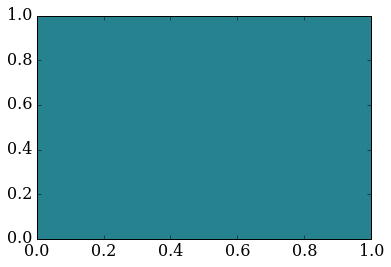

In [73]:
plt.contourf(x, y, psi,cmap=cm.viridis)

In [74]:
p, w, i = stokes_flow(1, w, psi, dx, dy, 1e-6)
p = np.flipud(p)

In [75]:
psi.shape

(41, 41)

In [76]:
w.shape

(41, 41)

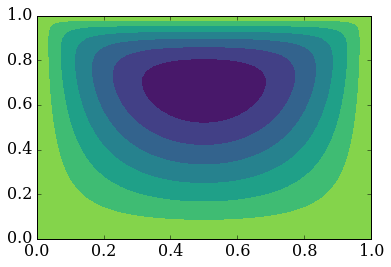

In [77]:
plt.contourf(x, y, p,cmap=cm.viridis)

In [78]:
print(i)

4447


In [79]:
#np.set_printoptions(threshold=None)

In [80]:
print(p)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.         -0.01130501 -0.01700063 ..., -0.01700063 -0.01130501  0.        ]
 [ 0.         -0.01424233 -0.02431448 ..., -0.02431448 -0.01424233  0.        ]
 ..., 
 [ 0.         -0.00095784 -0.00190942 ..., -0.00190942 -0.00095784  0.        ]
 [ 0.         -0.00047874 -0.00095436 ..., -0.00095436 -0.00047874  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
